In [89]:
import numpy as np 

import pandas as pd
import matplotlib as mlt
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

%matplotlib inline

In [90]:
pleiades = pd.read_csv("data/Pleiades2.csv")
m87 = pd.read_csv("data/m87.csv")
print("(Rows,Columns) = ",pleiades.shape)
print("(Rows,Columns) = ",m87.shape)
pleiades.head()

(Rows,Columns) =  (148, 7)
(Rows,Columns) =  (58, 7)


,g_abs,bp_rp,dist,ra,dec,radius_val,teff_val
0,7.496439,0.462545,3143.796595,56.734234,24.078513,NaN,NaN
1,5.750892,1.227728,1980.607399,56.786219,24.050691,NaN,NaN
2,8.727491,1.093884,928.733338,56.775812,24.076348,NaN,NaN
3,6.420621,0.912203,2460.861216,56.712228,24.052304,NaN,NaN
4,11.173259,0.311281,644.014020,56.706357,24.140922,NaN,NaN


In [91]:
data = pd.read_csv("data/top10000.csv")
print("(Rows,Columns) = ",data.shape)
data.head()

(Rows,Columns) =  (10000, 7)


,g_abs,bp_rp,dist,ra,dec,radius_val,teff_val
0,25.971617,NaN,0.539991,272.237829,-27.645916,NaN,NaN
1,26.217232,0.842587,0.541292,274.906872,-25.255882,NaN,NaN
2,25.484451,NaN,0.593026,276.223193,-27.140479,NaN,NaN
3,25.850208,NaN,0.611889,273.112421,-31.184670,NaN,NaN
4,26.702303,NaN,0.660507,259.297177,-30.486547,NaN,NaN


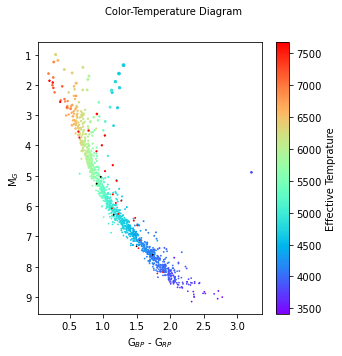

In [92]:
p = plt.figure()
p.set_figwidth(5)
p.set_figheight(5)
p.suptitle('Color-Temperature Diagram', fontsize=10)
new_data = data.dropna()
plt.scatter(new_data.bp_rp, new_data.g_abs, s=new_data.radius_val, c=new_data.teff_val, 
            cmap='rainbow')
plt.colorbar(label='Effective Temprature')
plt.scatter(pleiades.bp_rp, pleiades.g_abs, s=pleiades.radius_val, color='red')
plt.scatter(m87.bp_rp, m87.g_abs, s=m87.radius_val, color='black')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.show()


<IPython.core.display.Javascript object>


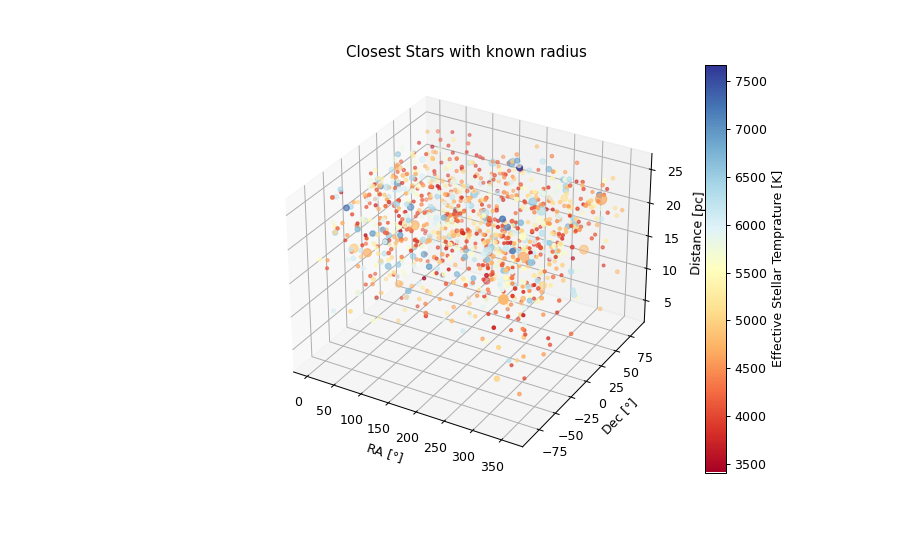

In [93]:
# Magic command for interactive 3D plots. 
%matplotlib notebook

fig=plt.figure(figsize = (10, 6))
# Define 3D axes
ax = plt.axes(projection ="3d")
# Plot the scatter graph using RA, Dec and distance. A colormap of Red-Yellow-Blue scale is used 
# with sizes s given by stellar radii (multiplied by 10 to make them well visible), 
# color c given by stellar effective temperature. Opacity is set by alpha
scatter_plot=ax.scatter3D(new_data.ra, new_data.dec, new_data.dist,
              s=new_data.radius_val*10, c=new_data.teff_val, cmap='RdYlBu')

#Setting labels, title and a colorbar for the figure
ax.set_xlabel('RA [$\degree$]')
ax.set_ylabel('Dec [$\degree$]')
ax.set_zlabel('Distance [pc]')
plt.title('Closest Stars with known radius')
fig.colorbar(scatter_plot, label="Effective Stellar Temprature [K]")